<div style="line-height:0.5">
<h1 style="color:#FF7C00  "> Autoencoders in TensorFlow 1 </h1>
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3>
    img_to_array + cv2 + UpSampling2D
</span>
</div> 

In [18]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import img_to_array

<h2 style="color:#FF7C00  "> <u> Example 1 </u></h2>

In [2]:
np.random.seed(4)

In [3]:
SIZE = 256
img_data = []

# Change 1 to 0 for grey images
img = cv2.imread('img_folder/gatto.jpeg', 1)   
# Switch BGR to RGB to show images in true colors
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
img = cv2.resize(img,(SIZE, SIZE))

img_data.append(img_to_array(img))

In [4]:
img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.

In [5]:
print(len(img_data))
print(img_array.size)

1
196608


In [6]:
print(img_data[0:3])

[array([[[149., 217., 254.],
        [149., 217., 254.],
        [149., 217., 254.],
        ...,
        [148., 217., 255.],
        [147., 217., 255.],
        [146., 218., 255.]],

       [[149., 217., 254.],
        [149., 217., 254.],
        [149., 217., 254.],
        ...,
        [148., 217., 255.],
        [147., 217., 255.],
        [146., 218., 255.]],

       [[149., 217., 254.],
        [149., 217., 254.],
        [149., 217., 254.],
        ...,
        [148., 217., 255.],
        [148., 217., 255.],
        [147., 217., 255.]],

       ...,

       [[ 40.,  47.,  57.],
        [ 39.,  46.,  56.],
        [ 38.,  45.,  55.],
        ...,
        [ 38.,  45.,  55.],
        [ 38.,  45.,  55.],
        [ 39.,  46.,  56.]],

       [[ 36.,  43.,  53.],
        [ 36.,  43.,  53.],
        [ 35.,  42.,  52.],
        ...,
        [ 40.,  47.,  57.],
        [ 42.,  49.,  59.],
        [ 39.,  46.,  56.]],

       [[ 43.,  50.,  60.],
        [ 41.,  48.,  58.],
        [ 40., 

In [7]:
""" Model 1 definition """
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

2023-09-25 16:48:14.248885: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 8)         0

In [8]:
### Training and Prediction
model.fit(img_array, img_array, epochs=5000, shuffle=True)
pred = model.predict(img_array)
pred

Epoch 1/5000
1/1 [==============================] - 3s 3s/step - loss: 0.6100 - accuracy: 0.6935
Epoch 2/5000
1/1 [==============================] - 0s 294ms/step - loss: 0.5911 - accuracy: 0.7038
Epoch 3/5000
1/1 [==============================] - 0s 221ms/step - loss: 0.5606 - accuracy: 0.7043
Epoch 4/5000
1/1 [==============================] - 0s 214ms/step - loss: 0.5097 - accuracy: 0.7064
Epoch 5/5000
1/1 [==============================] - 0s 249ms/step - loss: 0.4357 - accuracy: 0.7064
Epoch 6/5000
1/1 [==============================] - 0s 280ms/step - loss: 0.3458 - accuracy: 0.7065
Epoch 7/5000
1/1 [==============================] - 0s 254ms/step - loss: 0.2514 - accuracy: 0.7065
Epoch 8/5000
1/1 [==============================] - 0s 238ms/step - loss: 0.1825 - accuracy: 0.7065
Epoch 9/5000
1/1 [==============================] - 0s 217ms/step - loss: 0.1754 - accuracy: 0.7065
Epoch 10/5000
1/1 [==============================] - 0s 253ms/step - loss: 0.1989 - accuracy: 0.7064
Ep

array([[[[0.5891193 , 0.69233006, 0.7535898 ],
         [0.8732086 , 0.96531993, 0.9742673 ],
         [0.72782433, 0.8433862 , 0.8472276 ],
         ...,
         [0.62420666, 0.8080238 , 0.92293084],
         [0.634369  , 0.8494672 , 0.94664013],
         [0.6748627 , 0.80222625, 0.8696433 ]],

        [[0.7296527 , 0.8705676 , 0.93802744],
         [0.83809716, 0.99759674, 1.0981709 ],
         [0.6622935 , 0.8531014 , 0.9265694 ],
         ...,
         [0.62465346, 0.8989946 , 1.0113322 ],
         [0.6297684 , 0.92288977, 1.0511618 ],
         [0.59309524, 0.811559  , 0.90190375]],

        [[0.603345  , 0.7752494 , 0.83109707],
         [0.72293764, 0.8923004 , 0.93533653],
         [0.5765143 , 0.7995268 , 0.83578783],
         ...,
         [0.5949422 , 0.86733025, 0.97861   ],
         [0.63920915, 0.9064382 , 1.037961  ],
         [0.55182904, 0.7283625 , 0.8887328 ]],

        ...,

        [[0.19377416, 0.19369486, 0.22477926],
         [0.1708659 , 0.18063562, 0.19763952]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


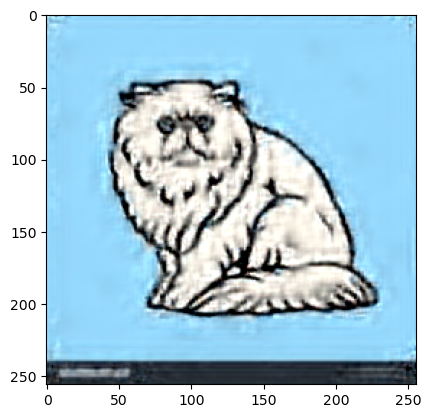

In [9]:
imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")

<h2 style="color:#FF7C00  ">  <u> Example 2 </u></h2>

In [10]:
# Split 
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [11]:
# Add some noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [12]:
# Clip weight: limit the values of an array to fall within a specified range (0 and 1 here).
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

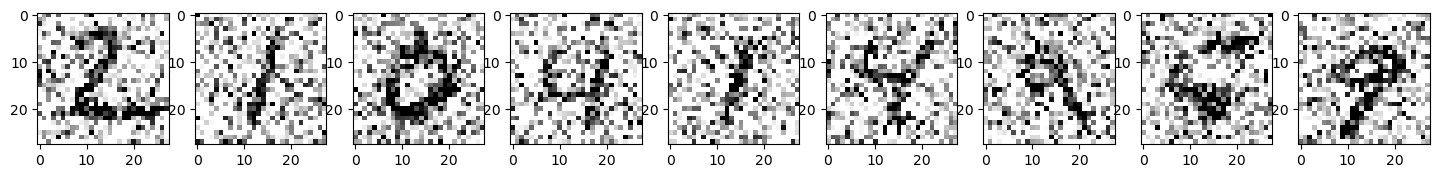

In [13]:
# Display noisy images
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

In [14]:
""" Model 2 definition """
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same')) 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 8)          

In [16]:
model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))
model.evaluate(x_test_noisy, x_test)

model.save('denoising_autoencoder.model')
no_noise_img = model.predict(x_test_noisy)

Epoch 1/10
235/235 [==============================] - 68s 284ms/step - loss: 0.0542 - val_loss: 0.0401
Epoch 2/10
235/235 [==============================] - 58s 249ms/step - loss: 0.0361 - val_loss: 0.0328
Epoch 3/10
235/235 [==============================] - 58s 246ms/step - loss: 0.0315 - val_loss: 0.0295
Epoch 4/10
235/235 [==============================] - 58s 247ms/step - loss: 0.0289 - val_loss: 0.0275
Epoch 5/10
235/235 [==============================] - 58s 246ms/step - loss: 0.0272 - val_loss: 0.0260
Epoch 6/10
235/235 [==============================] - 57s 243ms/step - loss: 0.0259 - val_loss: 0.0250
Epoch 7/10
235/235 [==============================] - 57s 242ms/step - loss: 0.0250 - val_loss: 0.0247
Epoch 8/10
235/235 [==============================] - 56s 239ms/step - loss: 0.0242 - val_loss: 0.0233
Epoch 9/10
235/235 [==============================] - 56s 240ms/step - loss: 0.0235 - val_loss: 0.0228
Epoch 10/10
313/313 [==============================] - 2s 8ms/step - loss

INFO:tensorflow:Assets written to: denoising_autoencoder.model/assets


313/313 [==============================] - 2s 8ms/step


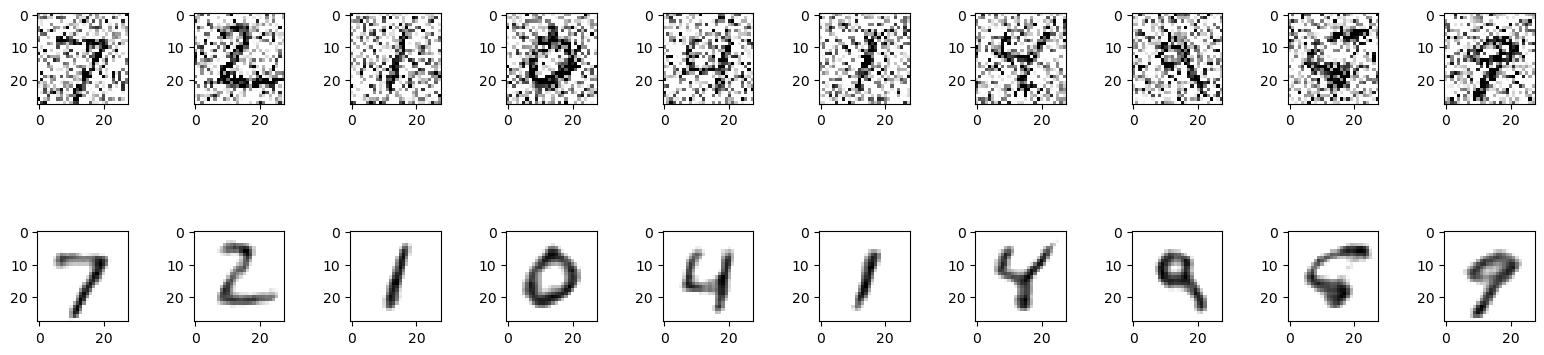

In [17]:
plt.figure(figsize=(40, 4))
for i in range(10):
    ## Display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    ## Display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()